Importing All The Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

Loading The Data File

In [3]:
application_data = pd.read_csv('application_data.csv')

Quicky Summary Of The Dataset Using .info() and verbose=True

In [5]:
application_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [9]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Checking the shape of the dataframe

In [10]:
application_data.shape

(307511, 122)

Listing down all the column names present in the dataset

In [11]:
application_data.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

Quick Five Number Of Numerical Variables Using .describe()
** Some categorical variables with min=0 and max=1 also included 

In [12]:
application_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


Text(0.5, 1.0, 'Percentage Of Target Variable Per Category')

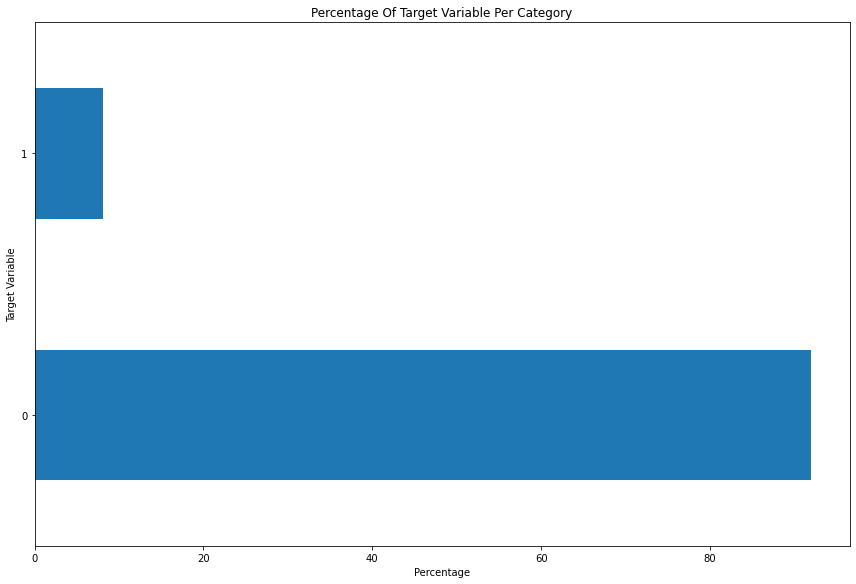

In [13]:
prct_target = 100*application_data['TARGET'].value_counts()/len(application_data['TARGET'])
prct_target.plot(kind='barh', figsize=(12, 8))
plt.xlabel('Percentage')
plt.ylabel('Target Variable')
plt.tight_layout()
plt.title('Percentage Of Target Variable Per Category')

In [14]:
print('Number of people who paid the loan back on time: {}'.format(application_data['TARGET'].value_counts()[0]))
print('Number of people who failed to pay the loan back on time: {}'.format(application_data['TARGET'].value_counts()[1]))
print('Percentage of people who paid the loan back on time: {}'.format(round(prct_target[0], 2)))
print('Percentage of people who failed to pay the loan back on time: {}'.format(round(prct_target[1], 2)))

Number of people who paid the loan back on time: 282686
Number of people who failed to pay the loan back on time: 24825
Percentage of people who paid the loan back on time: 91.93
Percentage of people who failed to pay the loan back on time: 8.07


THE DATASET IS HIGHLY IMBALANCED: 8:92

MOST OF THE LOANS WERE PAID BACK ON TIME(Target Variable=0)

# MISSING DATA

C:\Users\shivank\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Percentage Of Missing Values')

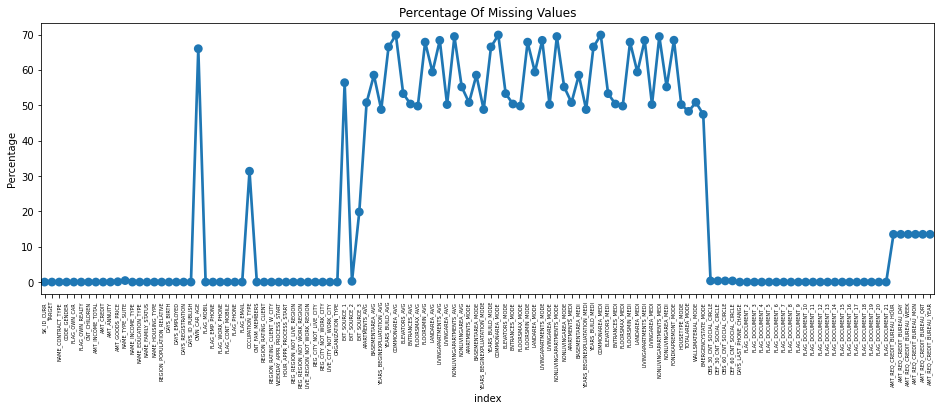

In [15]:
#visualizing the missing values
mis_values = pd.DataFrame((application_data.isnull().sum())/len(application_data)*100).reset_index()
plt.figure(figsize=(16, 5))
ax = sns.pointplot('index', 0, data=mis_values)
plt.xticks(rotation=90, fontsize=5)
plt.ylabel('Percentage')
plt.title('Percentage Of Missing Values')

As can be seen from the above vizualisation, there are lot of features which contain a lot of null values.

In [16]:
mis_values = mis_values.rename(columns={'index':'row', 0:'Percentage'})
# missing = mis_values[mis_values['Percentage'] >= 50]

In [17]:
missing = mis_values[mis_values['Percentage'] >= 30]

Removing the uncessesary columns i.e. which contain null values greater than 50 percent.

In [18]:
remove_columns = missing['row'][3:].tolist()
app_data = application_data.copy()
columns = app_data.columns.tolist()

for column in columns:
    if column in remove_columns:
        app_data.drop(column, axis=1, inplace=True)

Now we check for columns containing very low amount of null values and by taking a closer look at them, we decide to drop the null values since they form a very low percent of the overall data.

In [19]:
app_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [22]:
app_data = app_data[app_data['NAME_TYPE_SUITE'].notna()]

In [23]:
app_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305198 entries, 0 to 307510
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   305198 non-null  int64  
 1   TARGET                       305198 non-null  int64  
 2   NAME_CONTRACT_TYPE           305198 non-null  object 
 3   CODE_GENDER                  305198 non-null  object 
 4   FLAG_OWN_CAR                 305198 non-null  object 
 5   FLAG_OWN_REALTY              305198 non-null  object 
 6   CNT_CHILDREN                 305198 non-null  int64  
 7   AMT_INCOME_TOTAL             305198 non-null  float64
 8   AMT_CREDIT                   305198 non-null  float64
 9   AMT_ANNUITY                  305186 non-null  float64
 10  AMT_GOODS_PRICE              305198 non-null  float64
 11  NAME_TYPE_SUITE              305198 non-null  object 
 12  NAME_INCOME_TYPE             305198 non-null  object 
 13 

# Data Exploration

After cleaning the dataset by removing unnecessary columns and dealing with the null values, we can finally start with exploring our dataset. 

We will start of with analysing the categorical variables with respect to the target variable and try to gain some insights.

In [24]:
def uniplot(col_name, label_rotation=False, horizontal_layout=True):
    temp = app_data[col_name].value_counts()
    df_abs =  pd.DataFrame({col_name: temp.index, 'absolute values': temp.values})
    x_val = df_abs[col_name].tolist()
    count = df_abs['absolute values'].tolist()
    df_app = app_data[[col_name, 'TARGET']].groupby(col_name).mean()
    df_app['TARGET'] = df_app['TARGET'].map(lambda x: round(x*100, 2))
    df_app.sort_values(by='TARGET', ascending=False, inplace=True)
    row_val = df_app.index.values.tolist()
    col_val = df_app['TARGET'].values.tolist()
    
    if horizontal_layout:
        fig, axes = plt.subplots(1, 2, figsize=(14, 8))
    else:
        fig, axes = plt.subplots(2, 1, figsize=(12, 14))
    axes[0].set_ylabel('Count', labelpad=14)
    s = sns.barplot(x=x_val, y=count, data=df_abs, ax=axes[0])
    if label_rotation:
        axes[0].tick_params(rotation=90)
    sns.barplot(x=row_val, y=col_val, data=df_app, ax=axes[1])
    if label_rotation:
        axes[1].tick_params(rotation=90)
    axes[1].set_ylabel('Percentage Of Applications Where The Loan Was NOT Paid Back', labelpad=14)
    plt.tight_layout()

In [25]:
categorical = app_data.select_dtypes(include=object).columns
categorical

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object')

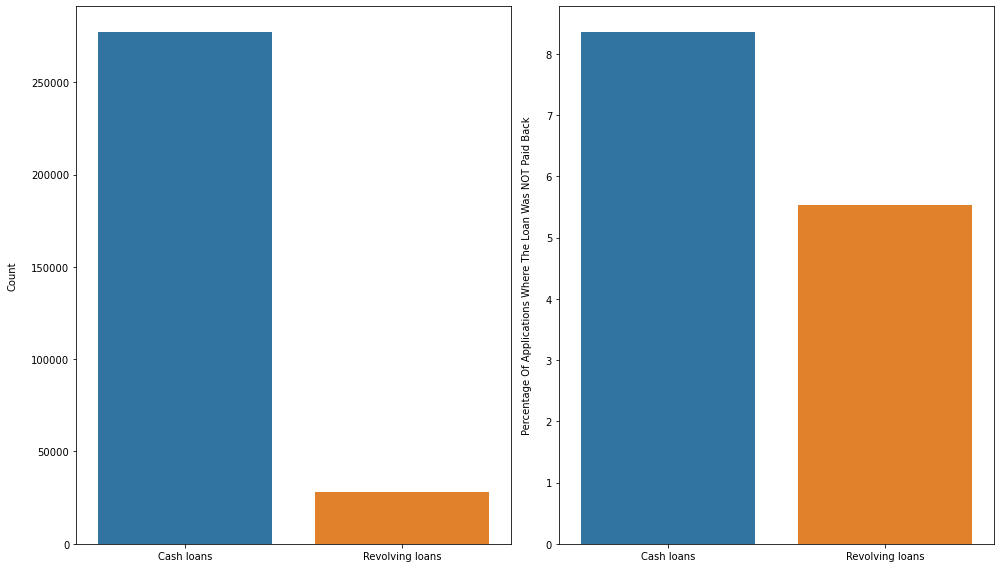

In [26]:
uniplot('NAME_CONTRACT_TYPE', False, True)

• Number of people taking cash loans is much highher than that if revolving loans.

• People taking cash loans also tend to default more than those taking revolving loans.

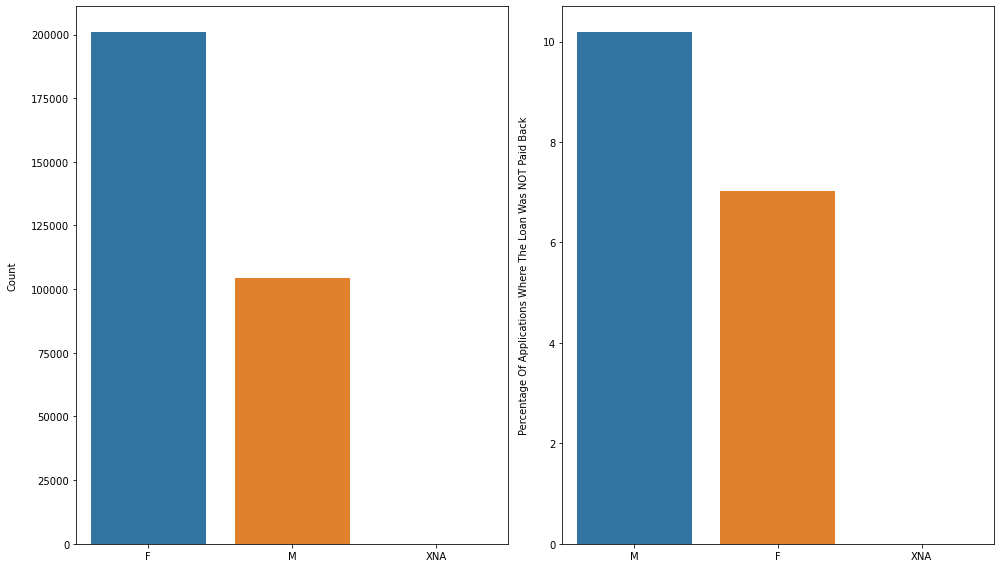

In [27]:
uniplot('CODE_GENDER', False, True)

• Female took more loans than male members but on an average, it was the male members who failed to pay back the loan more than the female ones.

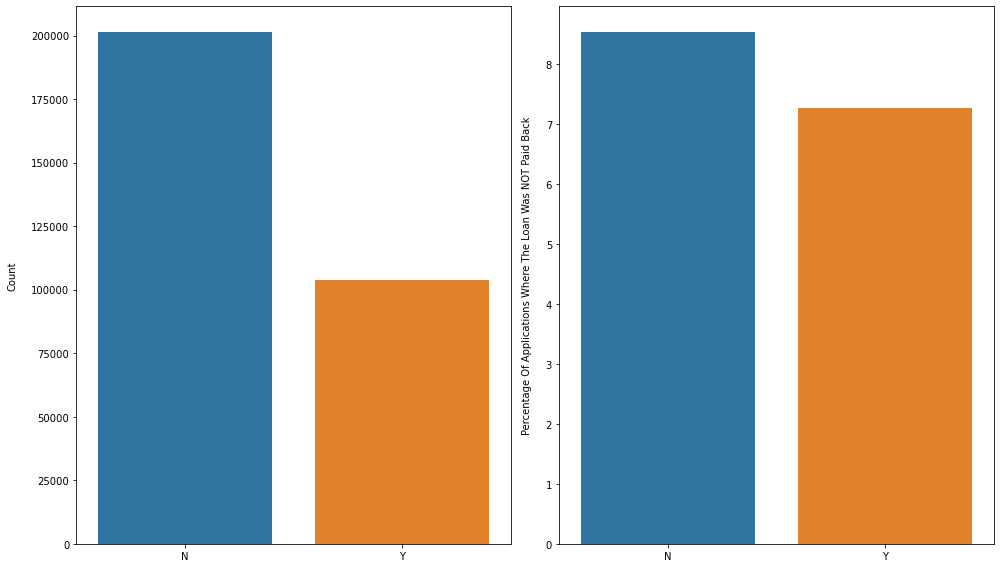

In [28]:
uniplot('FLAG_OWN_CAR', False, True)

• The majority of people who took the loans did not own any car and were also likely to default more than those who owned any car.

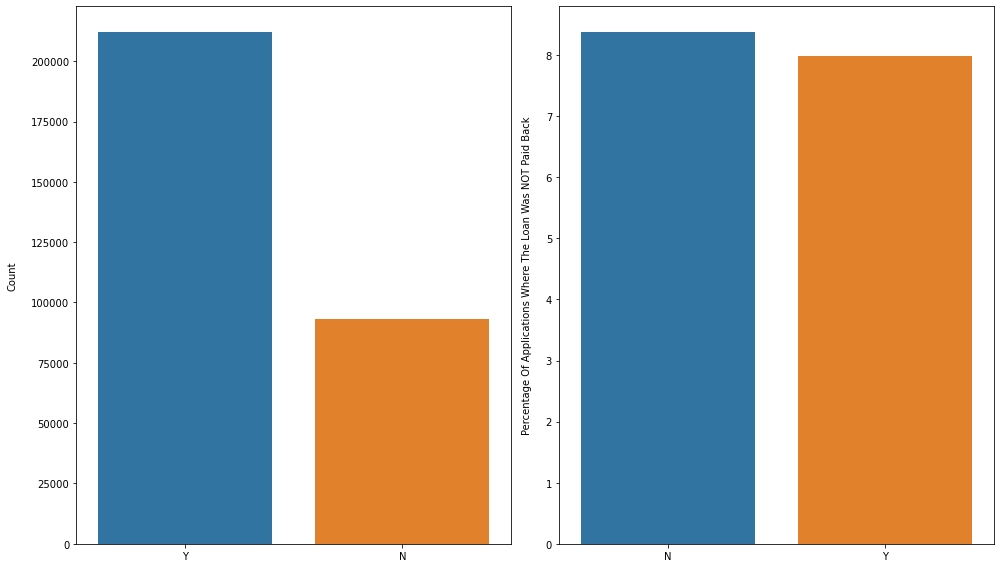

In [29]:
uniplot('FLAG_OWN_REALTY', False, True)

• Majority of people who applied for loans owned a house or a flat but it was people without any house or flat who defaulted slightly more than those owning it.

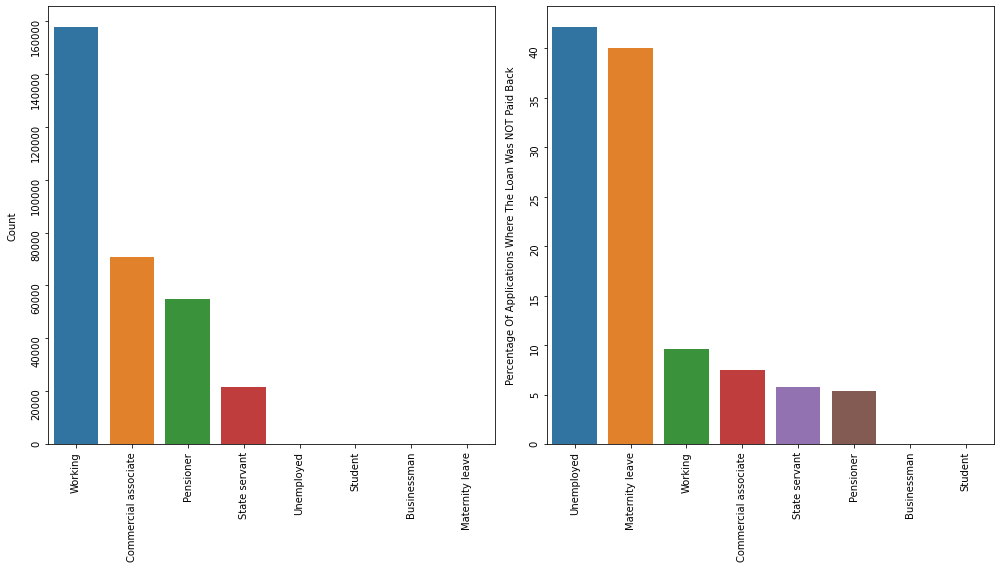

In [30]:
uniplot('NAME_INCOME_TYPE', True, True)

• Working people formed the majority in taking loans followed by commercial associate category.

• As expected, it was the unemployed people who defaulted the most and were unable to pay back their loans followed closely by those on maternity leave.

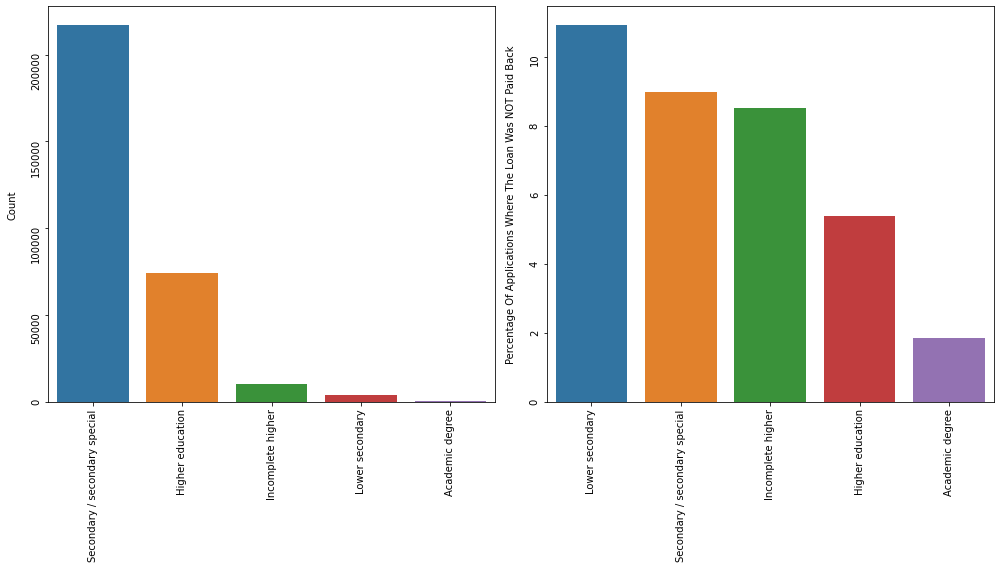

In [31]:
uniplot('NAME_EDUCATION_TYPE', True, True)

• People who had completed their education till secondary education took the most loans.

• Again as expected, people with lowest education type had the most difficulties in paying back their loans.

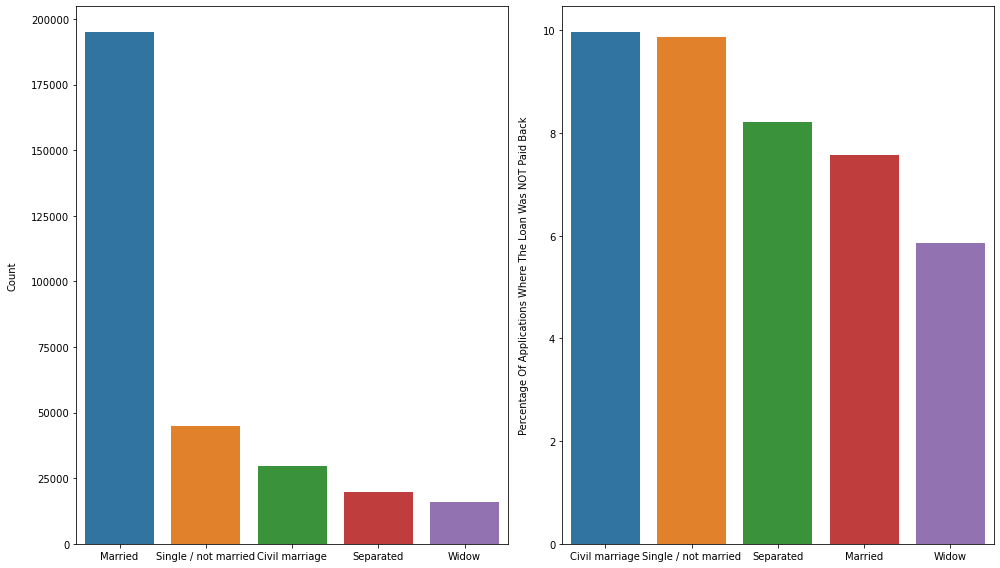

In [32]:
uniplot('NAME_FAMILY_STATUS', False, True)

• Married people took majority of the loans.

• People belonging to the civil marriage and single/not married category defaulted the most.

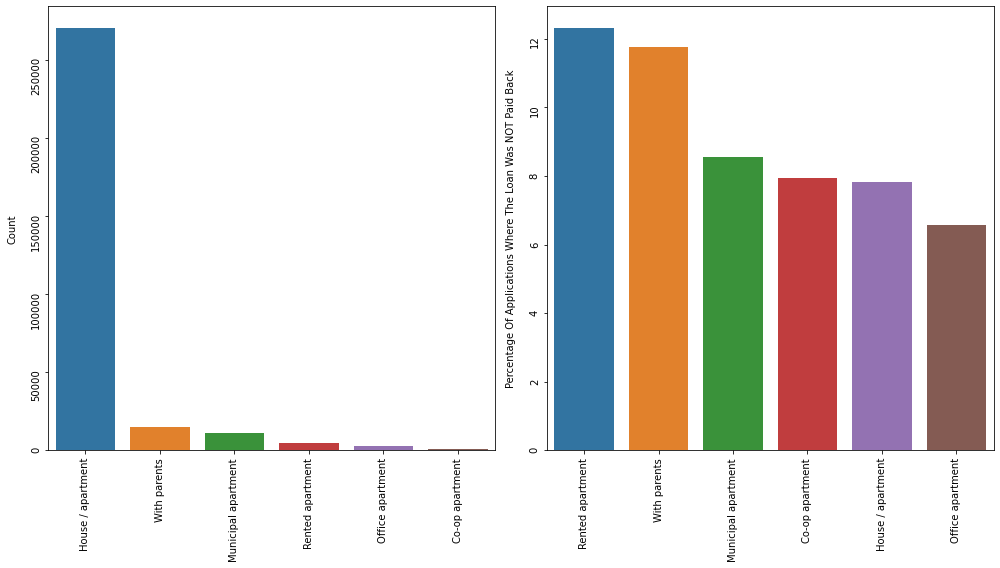

In [33]:
uniplot('NAME_HOUSING_TYPE', True, True)

• The highest amount of loans were given to those owning a house/living in an apartment.

• People living in rented apartments defaulted the most followed by those who were living with their parents.

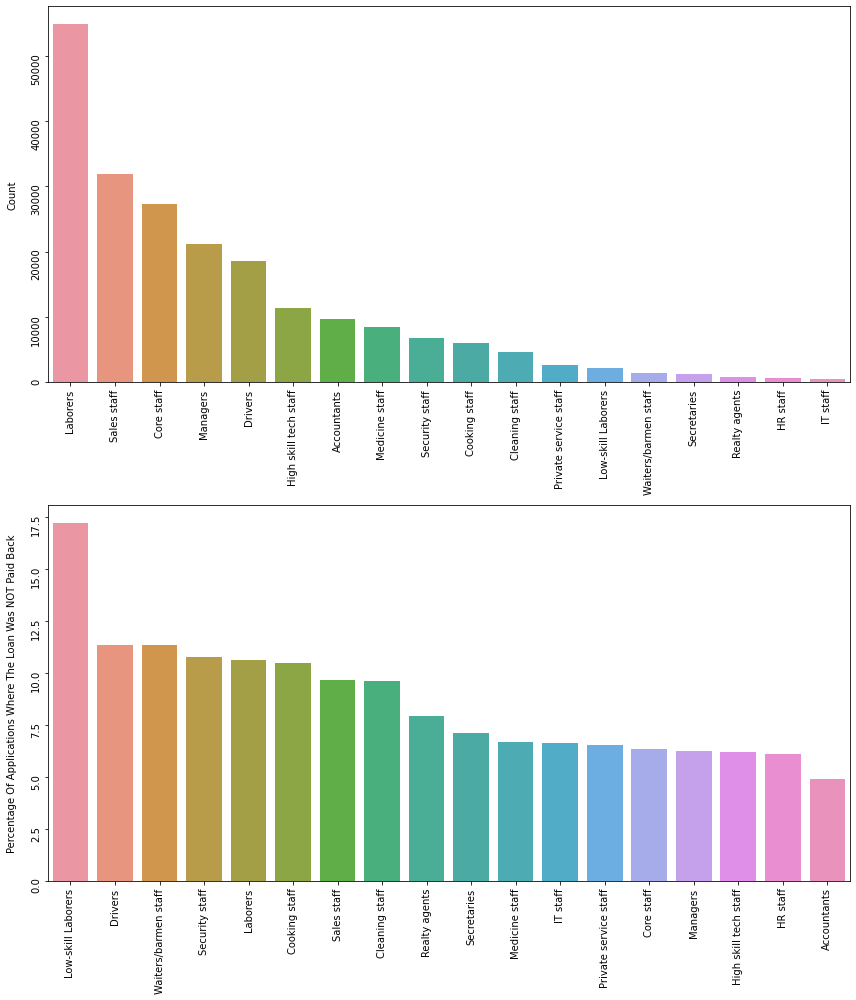

In [34]:
uniplot('OCCUPATION_TYPE', True, False)

• Labourers were given the majority of loans followed by those belonging to sales staff and core staff categories.

• Low-skilled labourers defaulted the most followed by drivers, waiters and security staff.

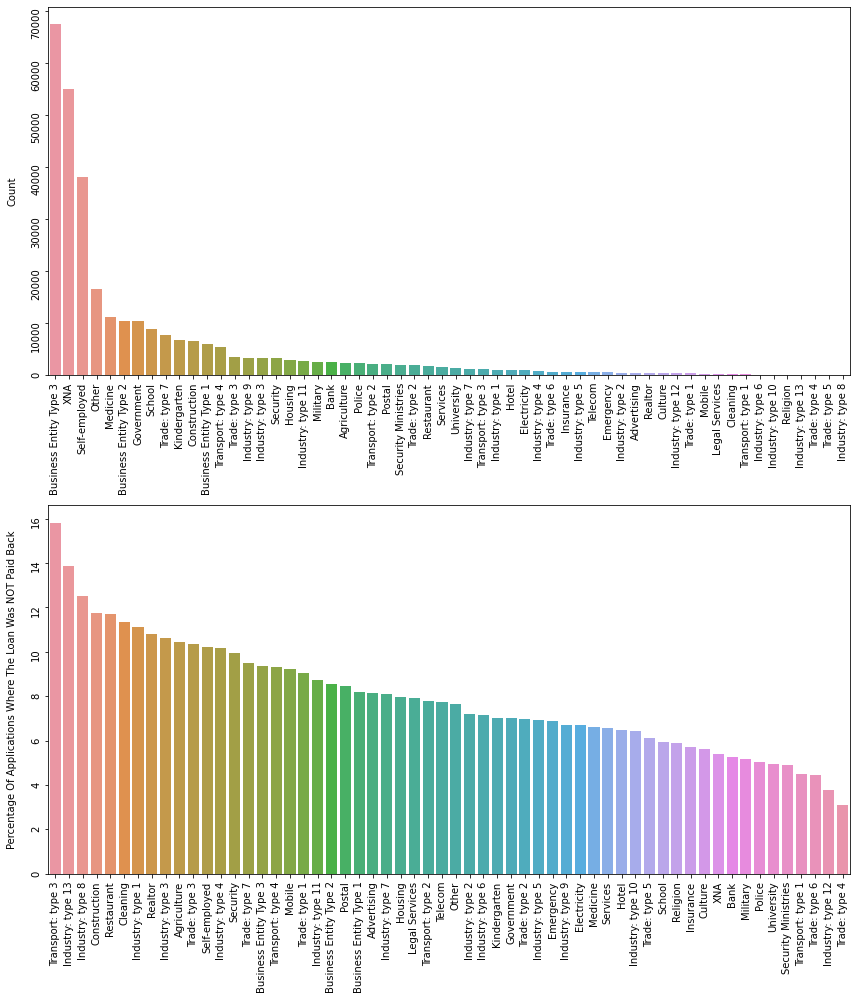

In [35]:
uniplot('ORGANIZATION_TYPE', True, False)

• Majority of the loans were given to Business Entity Type 3 

• Transport: type 3, Industry: type 13 and industry: type 8 had the highest defaulters while Trade: type 4 being the safest one.

# Analysis Of Numerical Variables

• Now as we are done with analysing the categorical features, it is time for us to analyse numerical features and try to gain some insights.

In [36]:
num = app_data.select_dtypes(include=['int64', 'float64']).columns

In [37]:
num

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', '

• Converting the income column to a categorical feature by dividing it into bins and using pd.qcut()

In [38]:
app_data['AMT_INCOME_TOTAL_GROUP'] = pd.qcut(app_data['AMT_INCOME_TOTAL'], q=10, precision=0, labels=False)

In [39]:
app_data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_TOTAL_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,7
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,8
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,5
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0,5
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,6


• Now it is time for us to visualize and look at various distributions of numerical features.

Text(0.5, 1.0, 'Amt Credit By TARGET variable')

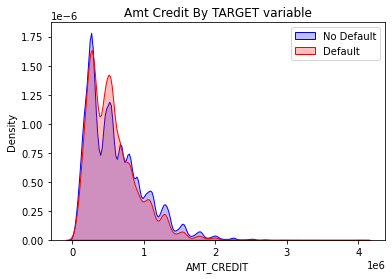

In [40]:
sns.kdeplot(app_data.loc[app_data['TARGET'] == 0, 'AMT_CREDIT'], color='blue',
           shade=True, label='No Default')
sns.kdeplot(app_data.loc[app_data['TARGET'] == 1, 'AMT_CREDIT'], color='red',
           shade=True, label='Default')
plt.legend()
plt.title('Amt Credit By TARGET variable')

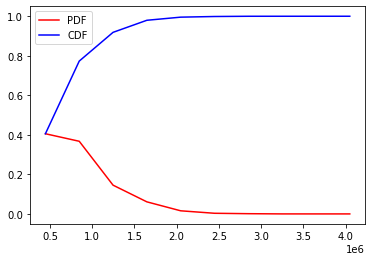

In [41]:
count, bin_counts = np.histogram(app_data['AMT_CREDIT'], bins=10)
pdf = count/sum(count)
cdf = np.cumsum(pdf)

plt.plot(bin_counts[1:], pdf, color='red', label='PDF')
plt.plot(bin_counts[1:], cdf, color='blue', label='CDF')
# plt.xscale('log')
plt.legend()

Text(0.5, 1.0, 'Income Group By TARGET Variable Distribution')

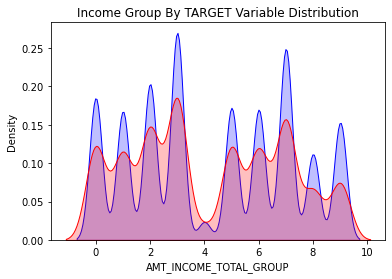

In [42]:
sns.kdeplot(app_data['AMT_INCOME_TOTAL_GROUP'][app_data['TARGET'] == 0],
           color='blue', shade='True', label='No Default')
sns.kdeplot(app_data['AMT_INCOME_TOTAL_GROUP'][app_data['TARGET'] == 1],
           color='red', shade=True, label='Default')
plt.title('Income Group By TARGET Variable Distribution')

Text(0.5, 1.0, 'Amount Goods Price On Consumer Loans sBy TARGET Variable Distribution')

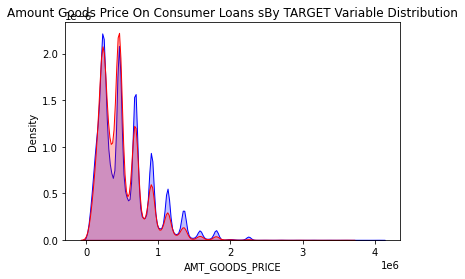

In [43]:
sns.kdeplot(app_data['AMT_GOODS_PRICE'][app_data['TARGET'] == 0],
           color='blue', shade='True', label='No Default')
sns.kdeplot(app_data['AMT_GOODS_PRICE'][app_data['TARGET'] == 1],
           color='red', shade=True, label='Default')
plt.title('Amount Goods Price On Consumer Loans sBy TARGET Variable Distribution')

In [44]:
app_data_dummies = pd.get_dummies(app_data)
app_data_dummies.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,0,0,0,0,0,0,0,0,0,0


In [45]:
correlations = app_data_dummies.corr()['TARGET'].sort_values(ascending=False)
print('Top 10 positive correlations with the TARGET variable are:\n', correlations.head(10))
print('Top 10 negative correlations with the TARGET variable are:\n', correlations.tail(10))

Top 10 positive correlations with the TARGET variable are:
 TARGET                                               1.000000
DAYS_BIRTH                                           0.078718
REGION_RATING_CLIENT_W_CITY                          0.060859
REGION_RATING_CLIENT                                 0.058856
NAME_INCOME_TYPE_Working                             0.057715
DAYS_LAST_PHONE_CHANGE                               0.055970
CODE_GENDER_M                                        0.055137
DAYS_ID_PUBLISH                                      0.051527
REG_CITY_NOT_WORK_CITY                               0.050984
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049530
Name: TARGET, dtype: float64
Top 10 negative correlations with the TARGET variable are:
 REGION_POPULATION_RELATIVE             -0.036916
AMT_GOODS_PRICE                        -0.039581
DAYS_EMPLOYED                          -0.045218
ORGANIZATION_TYPE_XNA                  -0.046277
NAME_INCOME_TYPE_Pensioner         

• All the external sources are negatively correlated with the Target variable i.e. as the amount of the the external source increases, there is a higher chance of the loan getting paid back on time.

In [46]:
heatmap_corr = app_data_dummies[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
heatmap_corr = heatmap_corr.corr()
heatmap_corr

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155714,-0.160819,-0.179176,0.078718
EXT_SOURCE_1,-0.155714,1.000000,0.213938,0.187095,-0.600694
EXT_SOURCE_2,-0.160819,0.213938,1.000000,0.109218,-0.091829
EXT_SOURCE_3,-0.179176,0.187095,0.109218,1.000000,-0.205766
DAYS_BIRTH,0.078718,-0.600694,-0.091829,-0.205766,1.000000


Text(0.5, 1.0, 'Correlation for external sources and Age')

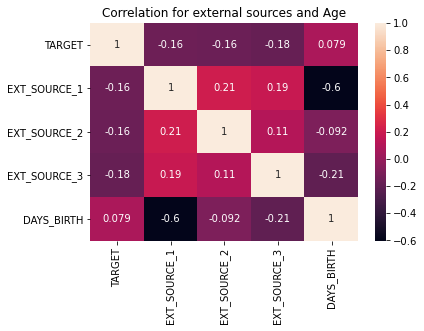

In [47]:
sns.heatmap(heatmap_corr, annot=True)
plt.title('Correlation for external sources and Age')

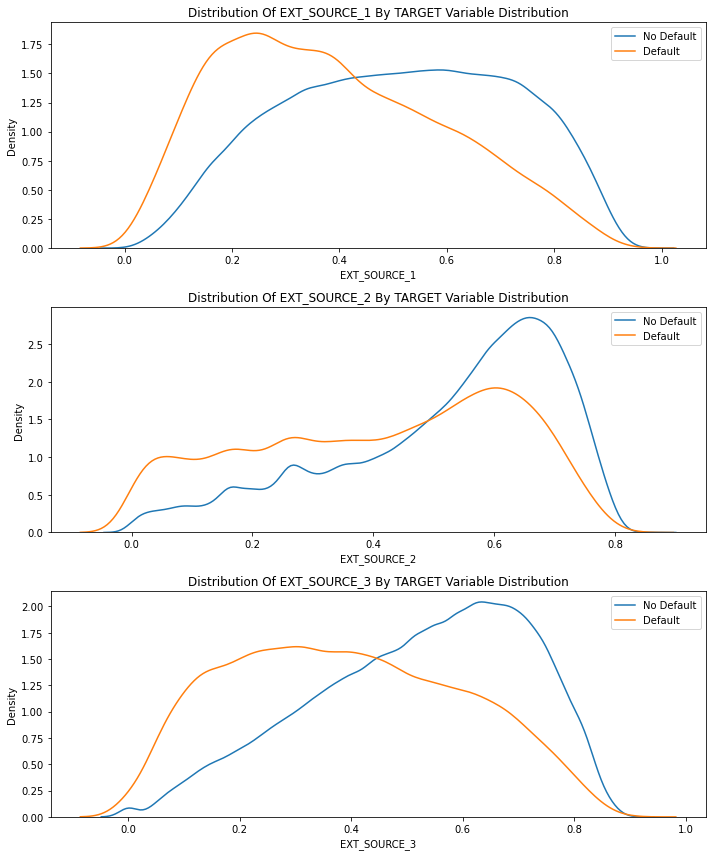

In [55]:
plt.figure(figsize=(10, 12))
externals = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']
for i, source in enumerate(externals):
    plt.subplot(3, 1, i+1)
    sns.kdeplot(app_data.loc[app_data['TARGET'] == 0, source], label='No Default')
    sns.kdeplot(app_data.loc[app_data['TARGET'] == 1, source], label='Default')
    plt.title('Distribution Of {} By TARGET Variable Distribution'.format(source))
    plt.legend()
    plt.tight_layout()

• As evident from the distributions(especially from EXT_SOURCE_2 and EXT_SOURCE_3), that as the amount of EXT_SOURCE increases, the default rate starts going down and vice versa.

# Previous Application Dataset Analysis

• Now we will analyse the previous_application.csv to gain some further insight and try to match up any similar observations that we got from the above dataset analysed i.e. application_data.csv

In [56]:
prev_app = pd.read_csv('previous_application.csv')

• Merging the previous_application dataset with the current_application on the common column SK_ID_CURR(Current Loan ID)

In [72]:
prev_app_new = application_data.merge(prev_app, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')

In [73]:
prev_app_new.shape

(1413701, 158)

In [58]:
prev_app.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [60]:
prev_app.shape

(1670214, 37)

In [61]:
prev_app.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT',
       'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT',
       'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'], dtype=object)

In [99]:
categorical2 = prev_app_new.select_dtypes(include=object).columns
categorical2

Index(['NAME_CONTRACT_TYPE_x', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE_x', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START_x', 'ORGANIZATION_TYPE',
       'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE',
       'EMERGENCYSTATE_MODE', 'NAME_CONTRACT_TYPE_y',
       'WEEKDAY_APPR_PROCESS_START_y', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE_y', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION'],
      dtype='object')

# Data Exploration

• Following the same pattern which we followed on the current_application dataset to analyse various features of the prev_application dataset with the TARGET variable.

In [74]:
def uniplot_2(col_name, label_rotation=False, horizontal_layout=True):
    temp = prev_app_new[col_name].value_counts()
    df_abs =  pd.DataFrame({col_name: temp.index, 'absolute values': temp.values})
    x_val = df_abs[col_name].tolist()
    count = df_abs['absolute values'].tolist()
    df_app = prev_app_new[[col_name, 'TARGET']].groupby(col_name).mean()
    df_app['TARGET'] = df_app['TARGET'].map(lambda x: round(x*100, 2))
    df_app.sort_values(by='TARGET', ascending=False, inplace=True)
    row_val = df_app.index.values.tolist()
    col_val = df_app['TARGET'].values.tolist()
    
    if horizontal_layout:
        fig, axes = plt.subplots(1, 2, figsize=(14, 8))
    else:
        fig, axes = plt.subplots(2, 1, figsize=(12, 14))
    axes[0].set_ylabel('Count', labelpad=14)
    s = sns.barplot(x=x_val, y=count, data=df_abs, ax=axes[0])
    if label_rotation:
        axes[0].tick_params(rotation=90)
    sns.barplot(x=row_val, y=col_val, data=df_app, ax=axes[1])
    if label_rotation:
        axes[1].tick_params(rotation=90)
    axes[1].set_ylabel('Percentage Of Applications Where The Loan Was NOT Paid Back', labelpad=14)
    plt.tight_layout()

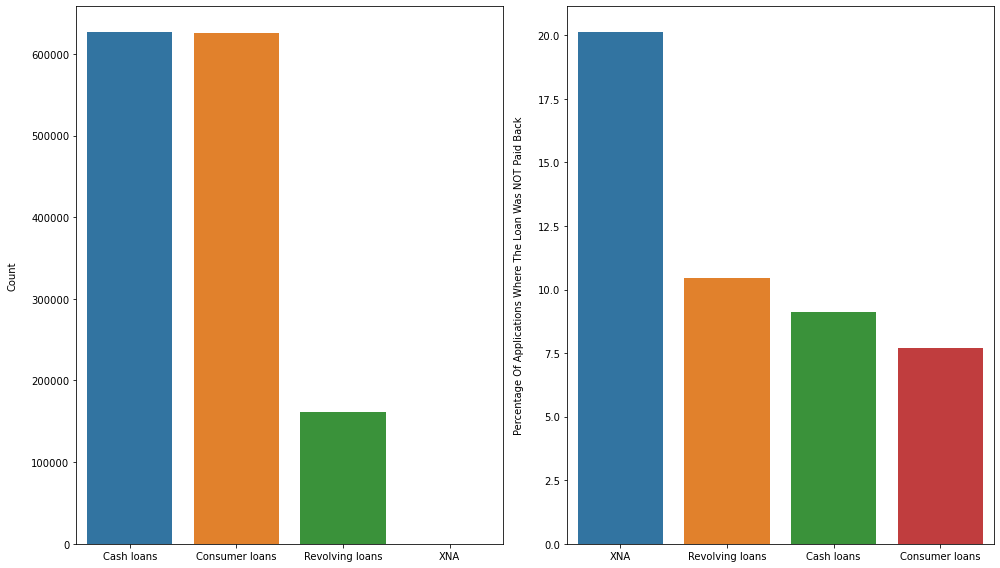

In [83]:
uniplot_2('NAME_CONTRACT_TYPE_y', False, True)

• The amount of cash loans and consumer loans in the previous loans is of similar amount but the default rate
of revolving loans is the highest.

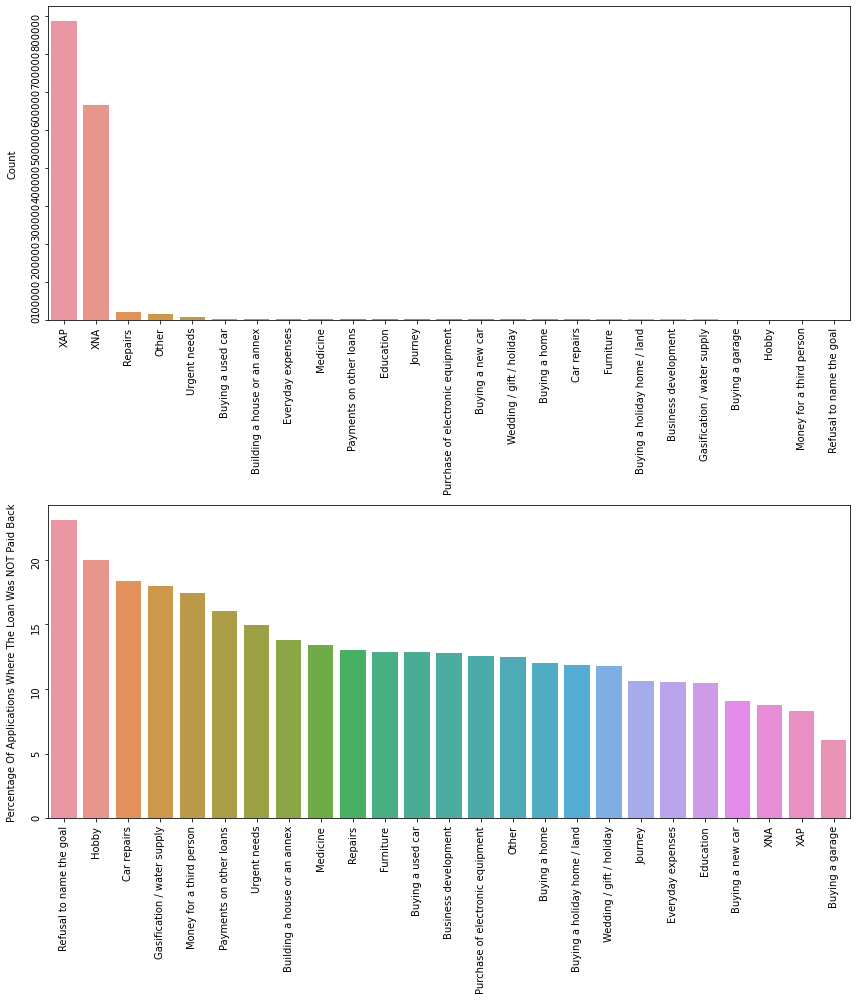

In [85]:
uniplot_2('NAME_CASH_LOAN_PURPOSE', True, False)

• The default rate was the highest for loans where there was no specific purpose in mind by the borrower followed by 'hobby', 'car repairs' and 'water supply' as the stated purpose.

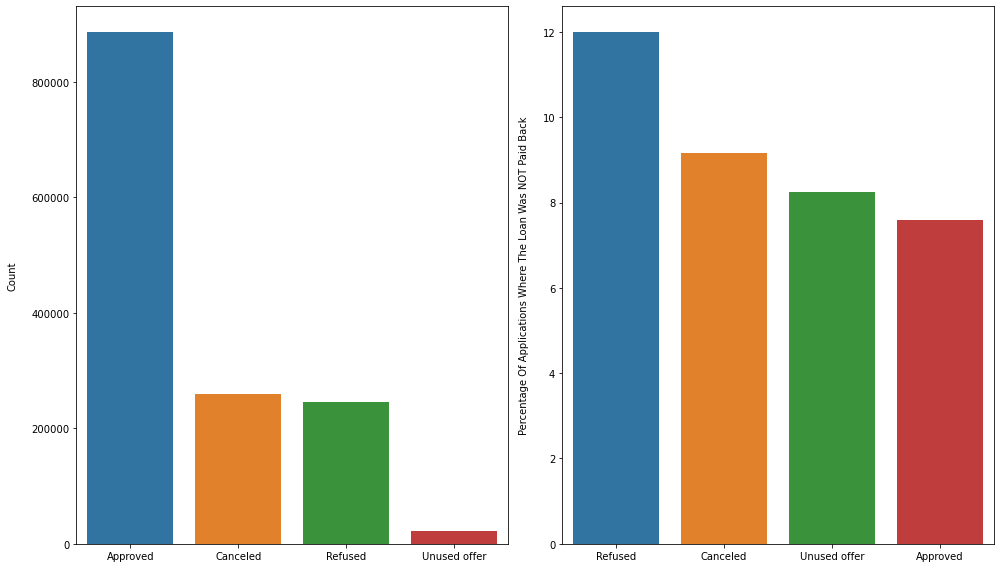

In [86]:
uniplot_2('NAME_CONTRACT_STATUS', False, True)

• The refused category in the prev_application dataset had the highest default rate in the current_application dataset followed by the canceled category.

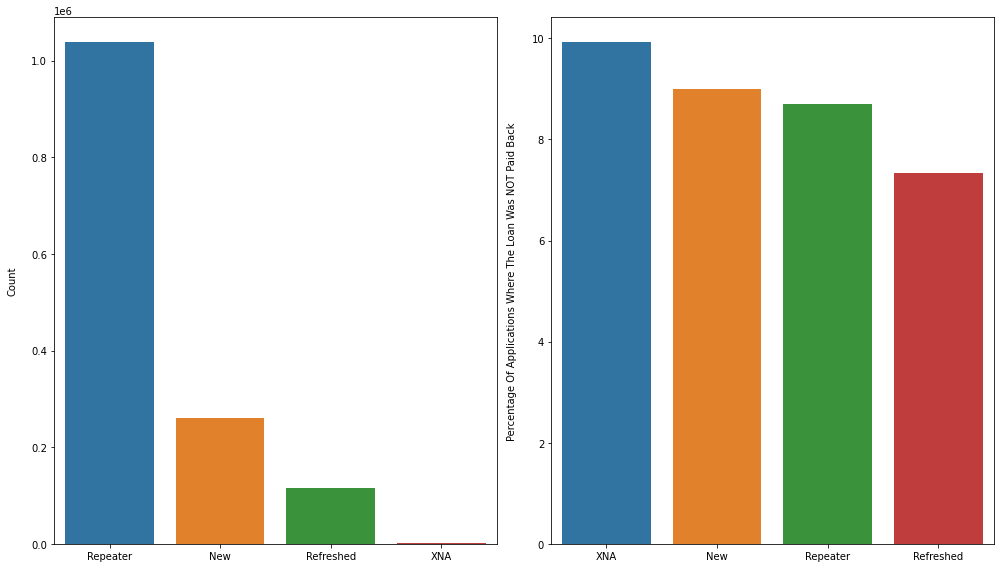

In [92]:
uniplot_2('NAME_CLIENT_TYPE', False, True)

• The Repeater type had the highest frequency in the prev_application dataset. 

• The new clients in the previous_application defaulted the most in the current_application dataset.

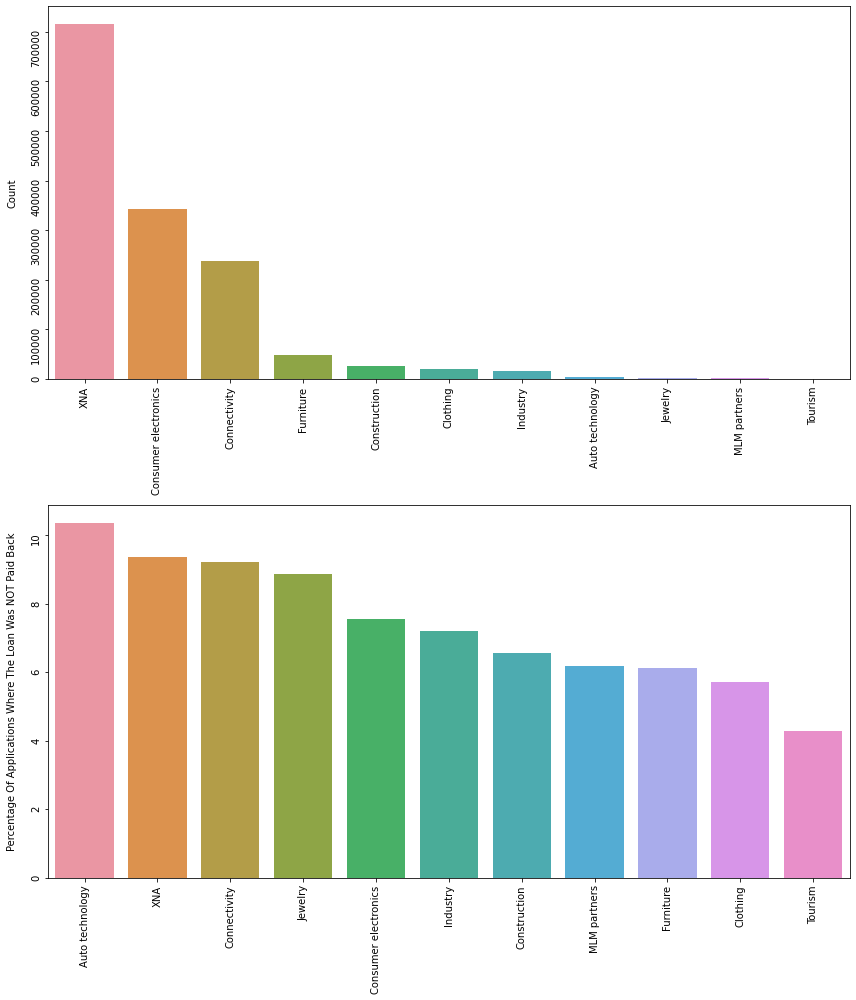

In [95]:
uniplot_2('NAME_SELLER_INDUSTRY', True, False)

• Most of the clients were from the consumer electronics industry in the prev_application dataset.

• Clients from the auto technology had the highest default rate in the current_application dataset followed by those working Connectivity and Jewelry.

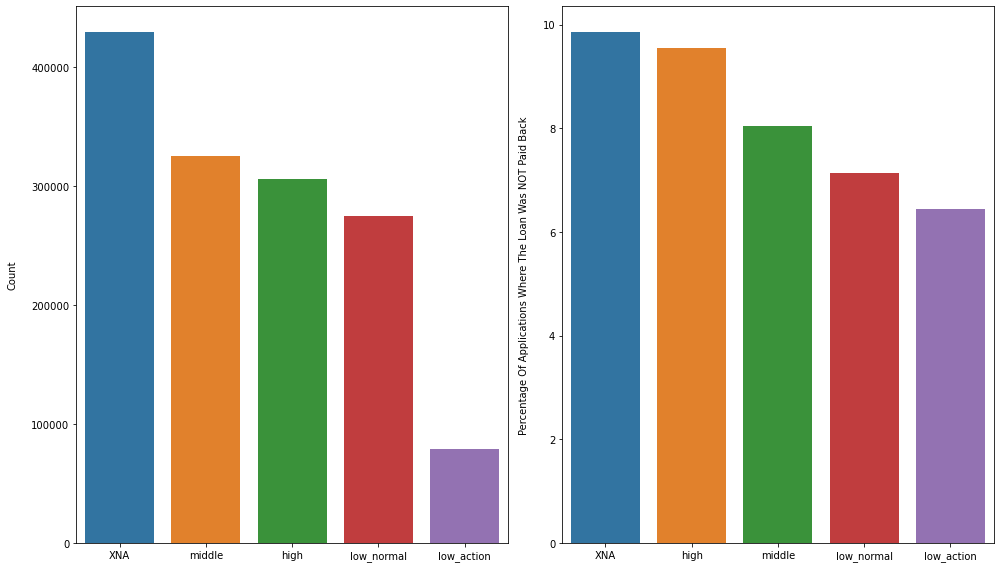

In [96]:
uniplot_2('NAME_YIELD_GROUP', False, True)

• The clients categorised into the middle interest group had the highest frequency.

• The clients in the high interest rate group in the previous_application dataset had the highest default rate in the current_application dataset.

# CONCLUSION:

• After analysing both the current and the previous application datasets, here are some of the conclusions which we can draw:

1) A large amount of loans are being given to clients who don't own any car despite the fact that they have a high default rate compared to those with the car. Banks should be cautious giving loans to people who do not own the car.

2) Banks should try to give more loans to businessman, student occupation types as these have a very low default rate.

3) Banks should be cautious in giving loans to clients who have done a Civil Marriage since they have got a very high default rate. 

4) Banks should be cautious of giving loans to clients living with their parents since this category had a very high default rate. Clients having their own apartment or living in office apartment have a very low default rate as compared.

5) High rate of defaults at lower rates of incomes, amount credit and amount annuity and vice versa.

6) All the external sources columns(1, 2 and 3) are negatively correlated with the default rate i.e as the amount of external source increases the default rate goes down and vice versa.